# Import Packges

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew

In [3]:
# Load dataset
fd = pd.read_csv('Processed_Flipdata - Processed_Flipdata.csv')
fd.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


In [4]:
fd.shape

(541, 12)

In [5]:
# Check data types and null Values 
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


# Data Wrangling

In [11]:
# Dropping the unnecessary Unnamed: 0 column
fd.drop('Unnamed: 0', axis=1, inplace=True)

In [13]:
fd.describe()

,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,0.062847,16.431201
std,60.600694,1.984923,780.148862,0.242911,2.523553
min,16.000000,2.000000,800.000000,0.000000,4.500000
25%,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,128.000000,8.000000,5000.000000,0.000000,16.940000
max,256.000000,8.000000,7000.000000,1.000000,41.940000


In [15]:
# Check null value
fd.isnull().sum()

Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [17]:
fd

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [19]:
# Change Columns name from 'Rear Camera' and 'Front Camera' to 'Rear Camera in MP','Front Camera in MP' respectively.
fd.rename(columns={'Rear Camera': 'Rear Camera in MP', 'Front Camera': 'Front Camera in MP'}, inplace = True)

# Remove string  from both columns and change data type
fd['Rear Camera in MP'] = fd['Rear Camera in MP'].str.replace("MP", "", regex=True)
fd['Front Camera in MP'] = fd['Front Camera in MP'].str.replace("MP", "", regex=True)

# Change Data types of two columns Rear Camera in MP, Front Camera in MP.
fd['Rear Camera in MP'] = fd['Rear Camera in MP'].astype('int64')
fd['Front Camera in MP'] = fd['Front Camera in MP'].astype('int64')

In [21]:
# Change data types of Prize from object to int but coloumn elements are contained comma(,) in prize, So it can not directly convert into int
# first lets removed comma from prize then change data type
fd['Prize'] = fd['Prize'].str.replace(",", "", regex=True).astype('int64')

In [23]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Model               541 non-null    object 
 1   Colour              541 non-null    object 
 2   Memory              541 non-null    int64  
 3   RAM                 541 non-null    int64  
 4   Battery_            541 non-null    int64  
 5   Rear Camera in MP   541 non-null    int64  
 6   Front Camera in MP  541 non-null    int64  
 7   AI Lens             541 non-null    int64  
 8   Mobile Height       541 non-null    float64
 9   Processor_          541 non-null    object 
 10  Prize               541 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 46.6+ KB


In [25]:
# Categorised Colours Columns by grouping colours in broader categories

# Remove extra spaces from Colour Columns
fd['Colour'] = fd['Colour'].str.strip()  

# categorize the error in Colour Columns as Unknown
fd['Colour'] = fd['Colour'].replace('M3)', 'Unknown') 


In [27]:
# def Function is used to group colours
# Here Name of colours are given according to their broader categories
def categorise_colour(colour):
    if 'Black' in colour:
        return 'Black'
    elif 'Blue' in colour:
        return 'Blue'
    elif 'Green' in colour:
        return 'Green'
    elif 'Gold' in colour:
        return 'Gold'
    elif 'White/S' in colour:
        return 'White'
    elif 'Red' in colour:
        return 'Red'
    elif 'Yellow' in colour:
        return 'Yellow'
    elif 'Cyan' in colour:
        return 'Cyan'
    else:
        return 'Other'

In [29]:
# Apply the function
fd['Colour_categories'] = fd['Colour'].apply(categorise_colour)

In [31]:
fd.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera in MP,Front Camera in MP,AI Lens,Mobile Height,Processor_,Prize,Colour_categories
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Black
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Blue
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999,Other
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649,Blue
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999,Other


Output:
1) New column is created for colours in broader categories.
2) This column is contained the name of colours according to theirs highest frequency.
3) Remaining colours which have a less frequency categorised as Other. 

In [34]:
# Dropping Colours columns from dadaset
fd.drop('Colour', axis = 1, inplace = True)

In [36]:
fd.head()

,Model,Memory,RAM,Battery_,Rear Camera in MP,Front Camera in MP,AI Lens,Mobile Height,Processor_,Prize,Colour_categories
0,Infinix SMART 7,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Black
1,Infinix SMART 7,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299,Blue
2,MOTOROLA G32,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999,Other
3,POCO C50,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649,Blue
4,Infinix HOT 30i,128,8,5000,50,5,1,16.76,G37,8999,Other


# Univariant Analysis

In [39]:
# Creating a seprate data list for analysis
numerical_data = ['Memory','RAM','Battery_','Rear Camera in MP','Front Camera in MP','Mobile Height','Prize']
categorical_data = ['Model','Processor_','Colour_categories','AI Lens']

In [41]:
fd[numerical_data]

,Memory,RAM,Battery_,Rear Camera in MP,Front Camera in MP,Mobile Height,Prize
0,64,4,6000,13,5,16.76,7299
1,64,4,6000,13,5,16.76,7299
2,128,8,5000,50,16,16.64,11999
3,32,2,5000,8,5,16.56,5649
4,128,8,5000,50,5,16.76,8999
...,...,...,...,...,...,...,...
536,256,8,3900,50,12,15.49,79999
537,32,2,3100,5,2,12.70,5998
538,64,4,5000,50,8,16.76,9990
539,128,8,5000,50,32,16.26,38999


In [43]:
fd[categorical_data]

,Model,Processor_,Colour_categories,AI Lens
0,Infinix SMART 7,Unisoc Spreadtrum SC9863A1,Black,1
1,Infinix SMART 7,Unisoc Spreadtrum SC9863A1,Blue,1
2,MOTOROLA G32,Qualcomm Snapdragon 680,Other,0
3,POCO C50,Mediatek Helio A22,Blue,0
4,Infinix HOT 30i,G37,Other,1
...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Qualcomm Snapdragon 8 Gen 2,Other,0
537,LAVA Z21,Octa Core,Cyan,0
538,Tecno Spark 8T,MediaTek Helio G35,Cyan,0
539,SAMSUNG Galaxy A54 5G,"Exynos 1380, Octa Core",Other,0


# Checking outliers of all numerical data

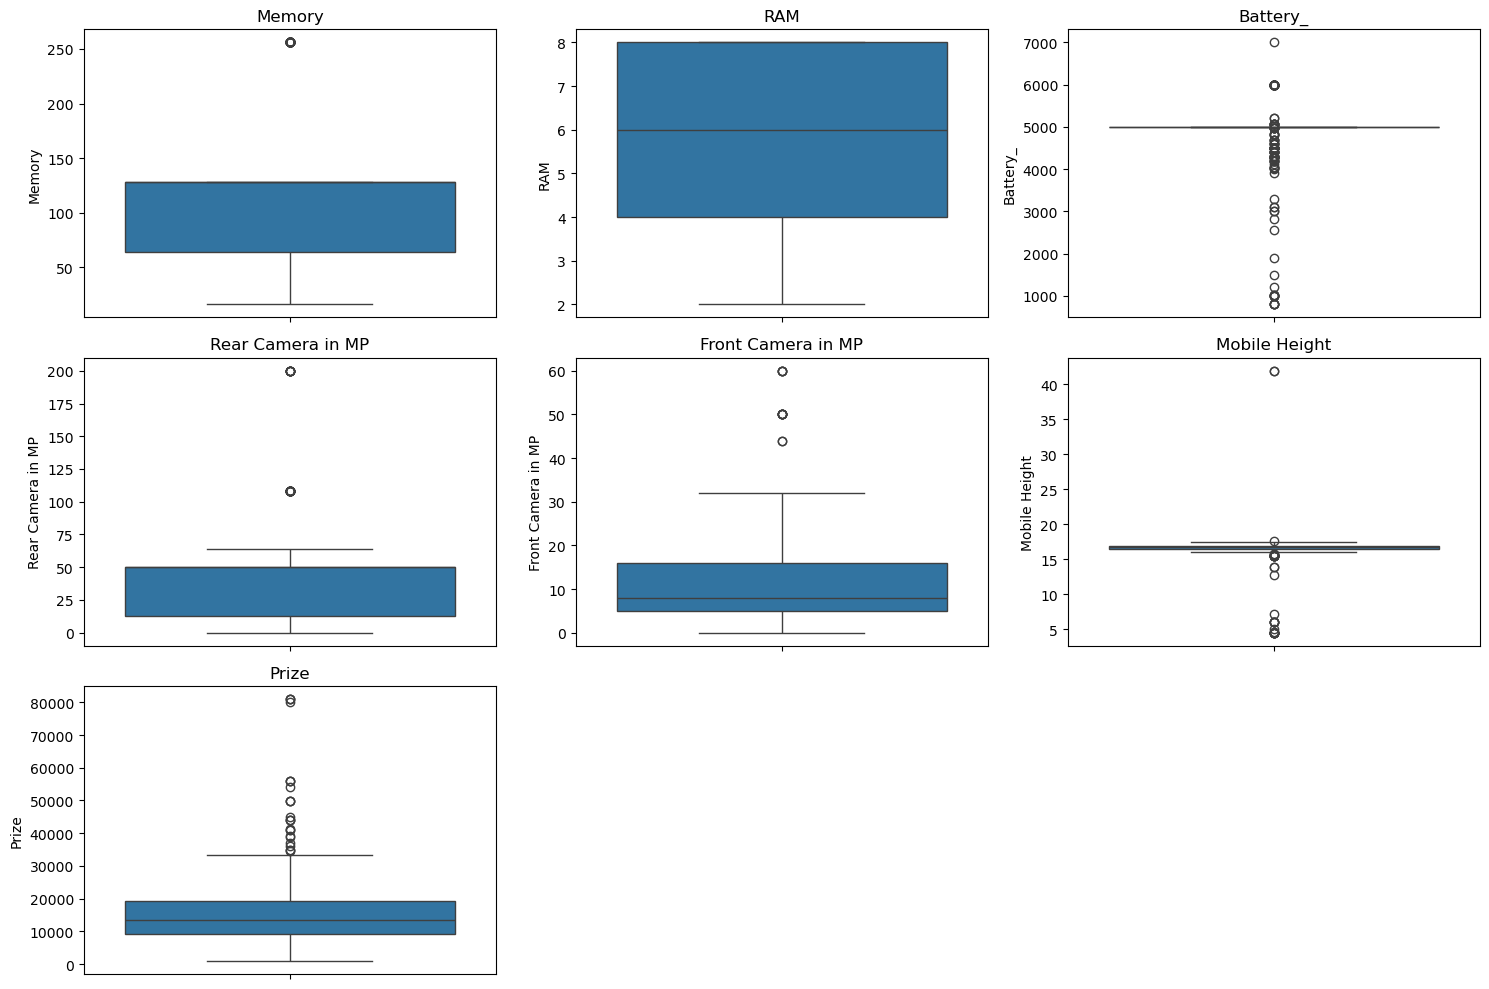

In [46]:
plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_data,1):
    plt.subplot(3,3,i)
    sns.boxplot(y = fd[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Output:
1) 'Memory',Battery_','Rear Camera in MP','Front Camera in MP','Mobile Height','Prize' are containing the outliers.
2) Only RAM Columns does not contain outliers

# Removing Outliers by using IQR (Inter Quartile Range)

In [49]:
# Here, IQR(Inter Quartile Range) Method is used to calculate outliers and capp with Min_value for Lower Value and Max_value for Upper Value.
for col in numerical_data:
    Q1 = fd[col].quantile(0.25)
    Q3 = fd[col].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = Q1 - 1.5 * IQR
    Max_value = Q3 + 1.5 * IQR
  
    print(f"{col} = Lower Value: {round(Min_value,2)}, Upper Value: {round(Max_value,2)}")
    
# Capping to handle outliers with Max_value and Min_value. 
    fd[col] = np.where(fd[col] > Max_value,Max_value,
                        np.where(fd[col] < Min_value, Min_value,fd[col]))

Memory = Lower Value: -32.0, Upper Value: 224.0
RAM = Lower Value: -2.0, Upper Value: 14.0
Battery_ = Lower Value: 5000.0, Upper Value: 5000.0
Rear Camera in MP = Lower Value: -42.5, Upper Value: 105.5
Front Camera in MP = Lower Value: -11.5, Upper Value: 32.5
Mobile Height = Lower Value: 15.87, Upper Value: 17.58
Prize = Lower Value: -5695.0, Upper Value: 34265.0


Output:
1) IQR(Inter Quartile Range) Method is used to calculate outliers and capp with Min_value for Lower Value and Max_value for Upper Value.

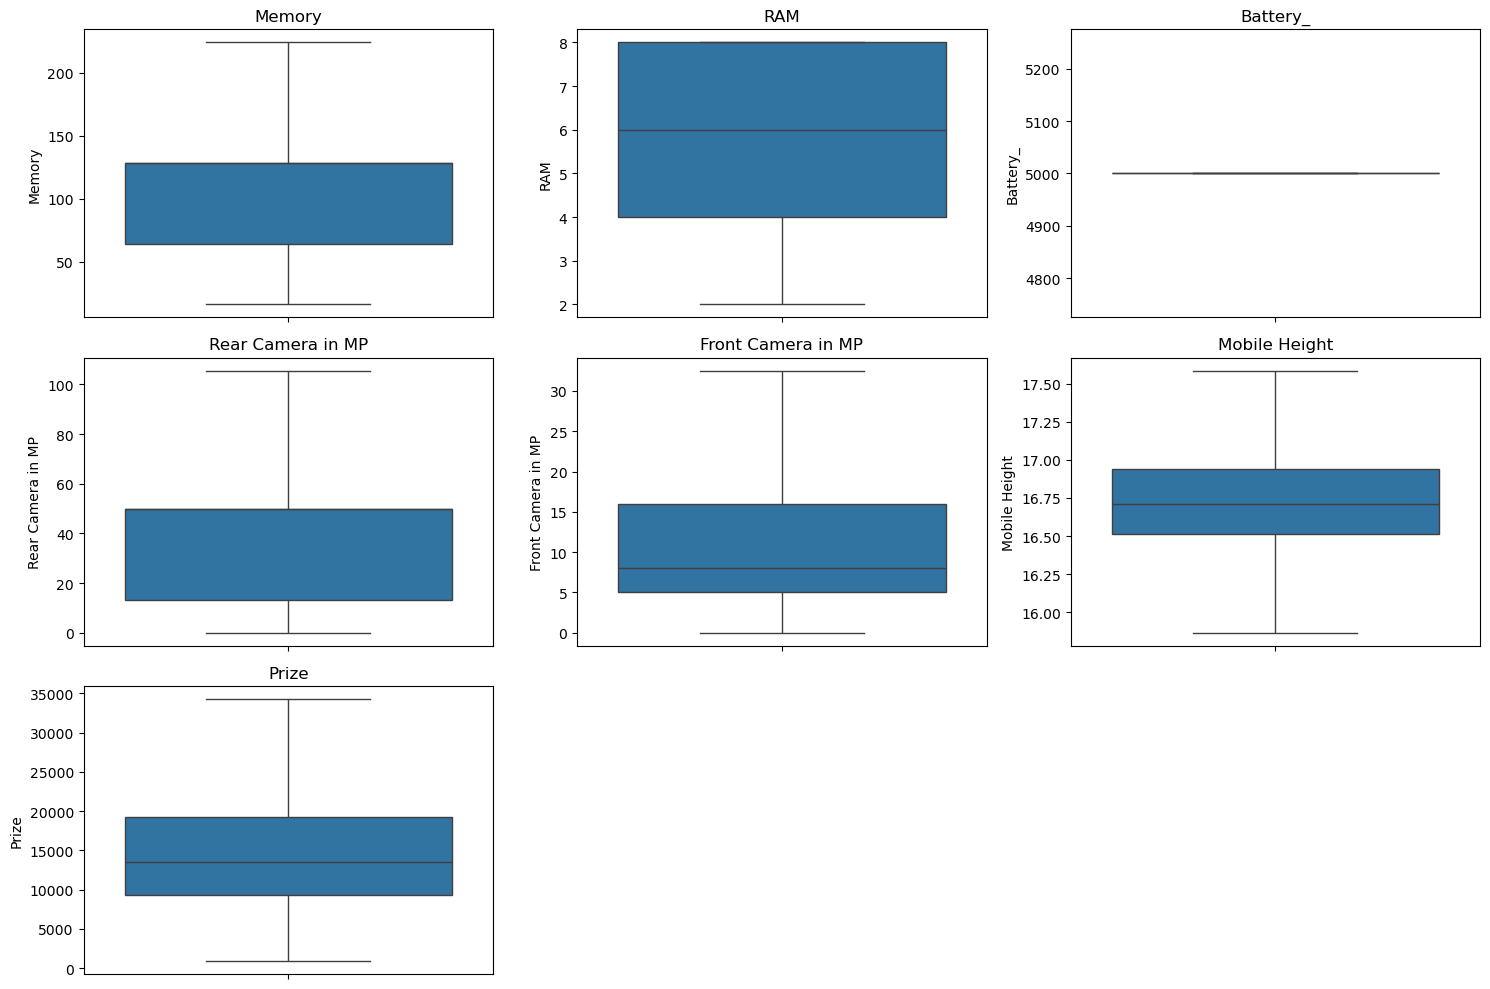

In [53]:
# After Capping Outliers with Min and Max value, Here Columns are checked Wheather it capped or not.
plt.figure(figsize = (15,10))
for i,col in enumerate(numerical_data,1):
    plt.subplot(3,3,i)
    sns.boxplot(y = fd[col])
    plt.title(col)
plt.tight_layout()
plt.show()

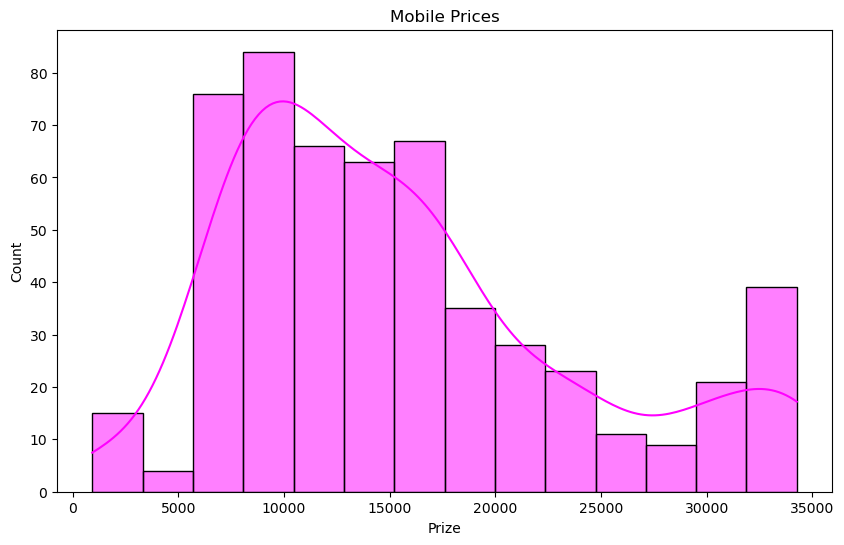

Skewness =  0.8016566257420018


In [54]:
plt.figure(figsize = (10,6))
sns.histplot(fd['Prize'], color= 'Magenta', kde = True)
plt.title('Mobile Prices')
plt.show()
print('Skewness = ',skew(fd['Prize']))

Output:
1) The highest Mobile price Range ditribution between 6000 to 18000
2) The highest number of Mobiles are sold between 6000 to 18000
3) The Mobile Price data are positively skiw

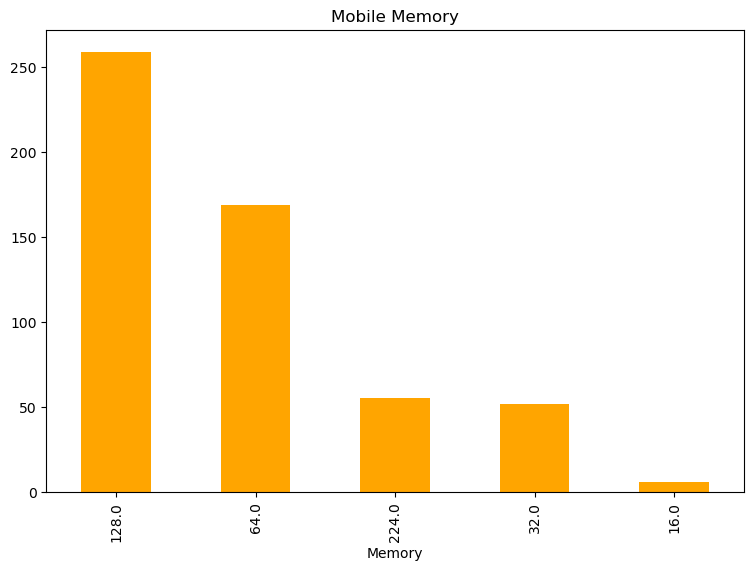

In [57]:
plt.figure(figsize = (9,6))
fd['Memory'].value_counts().plot(kind = 'bar', color = 'orange')
plt.title('Mobile Memory')
plt.show()

Output:
1) Majority of mobile have a 128GB Memories followed by 64GB and 224GB respectively.

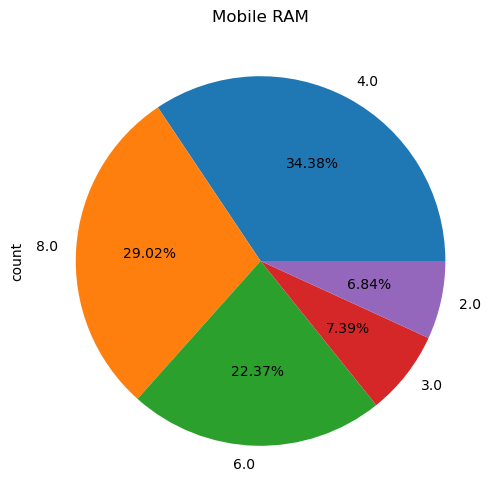

In [61]:
plt.figure(figsize = (9,6))
fd['RAM'].value_counts().plot(kind = 'pie', color = 'green', autopct = '%.2f%%')
plt.title('Mobile RAM')
plt.show()

Output:
1) Maximum number of mobile phone are available in 4GB RAM followed by 8GB and 6GB Respectively.
2) People are also prefering 4GB and 8GB RAM Mobile phone.

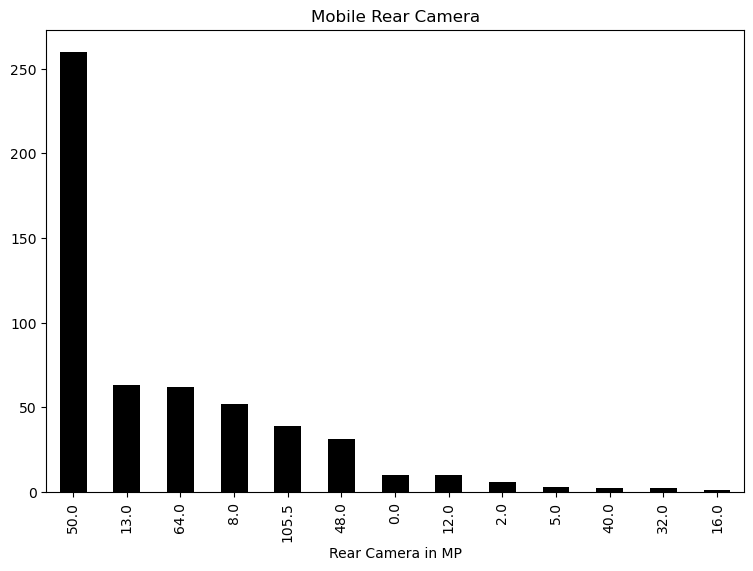

In [64]:
plt.figure(figsize = (9,6))
fd['Rear Camera in MP'].value_counts().plot(kind = 'bar', color = 'black')
plt.title('Mobile Rear Camera')
plt.show()

Output:
1) The highest number of People are prefering 50MP Rear Camera in phone.
2) followed by 13MP and 64MP respectively.

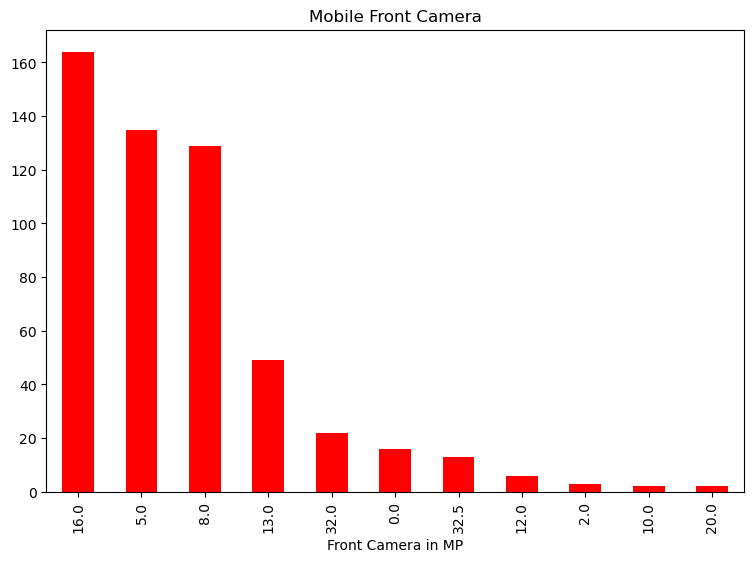

In [67]:
plt.figure(figsize = (9,6))
fd['Front Camera in MP'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('Mobile Front Camera')
plt.show()

Output:
1) The highest number of People are prefering 16MP Front Camera in phone.
2) followed by 5MP and 8MP respectively.

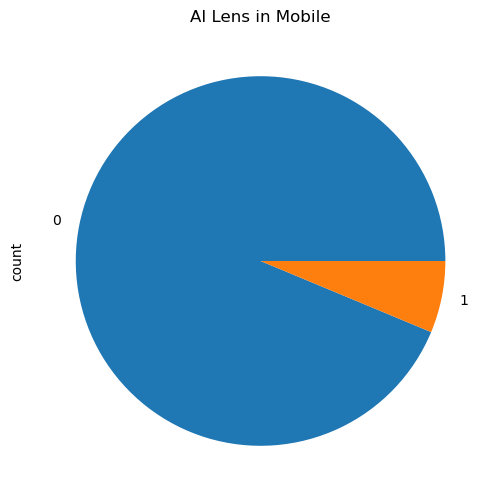

In [70]:
plt.figure(figsize = (9,6))
fd['AI Lens'].value_counts().plot(kind = 'pie', color = 'black')
plt.title('AI Lens in Mobile')
plt.show()

Output:
1) The Highest number of mobile phone are available without having a AI Lens.
2) A very few numbers of mobile phone are availabe with AI Lens.

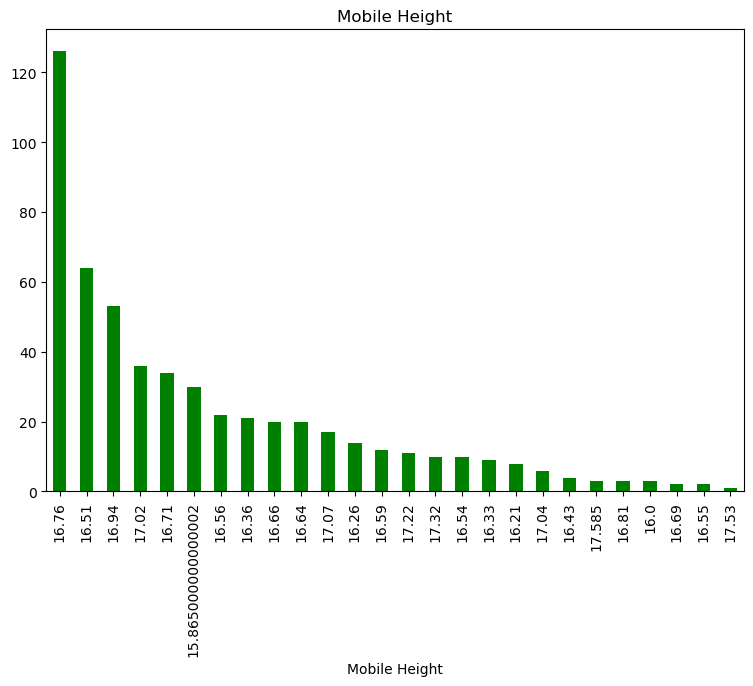

In [73]:
plt.figure(figsize = (9,6))
fd['Mobile Height'].value_counts().plot(kind = 'bar', color = 'green')
plt.title('Mobile Height')
plt.show()

Output:
1) Maximum number of mobile heights are prefered 16.76 inches.
2) followed by 16.71 inches, 16.94 inches repectively.

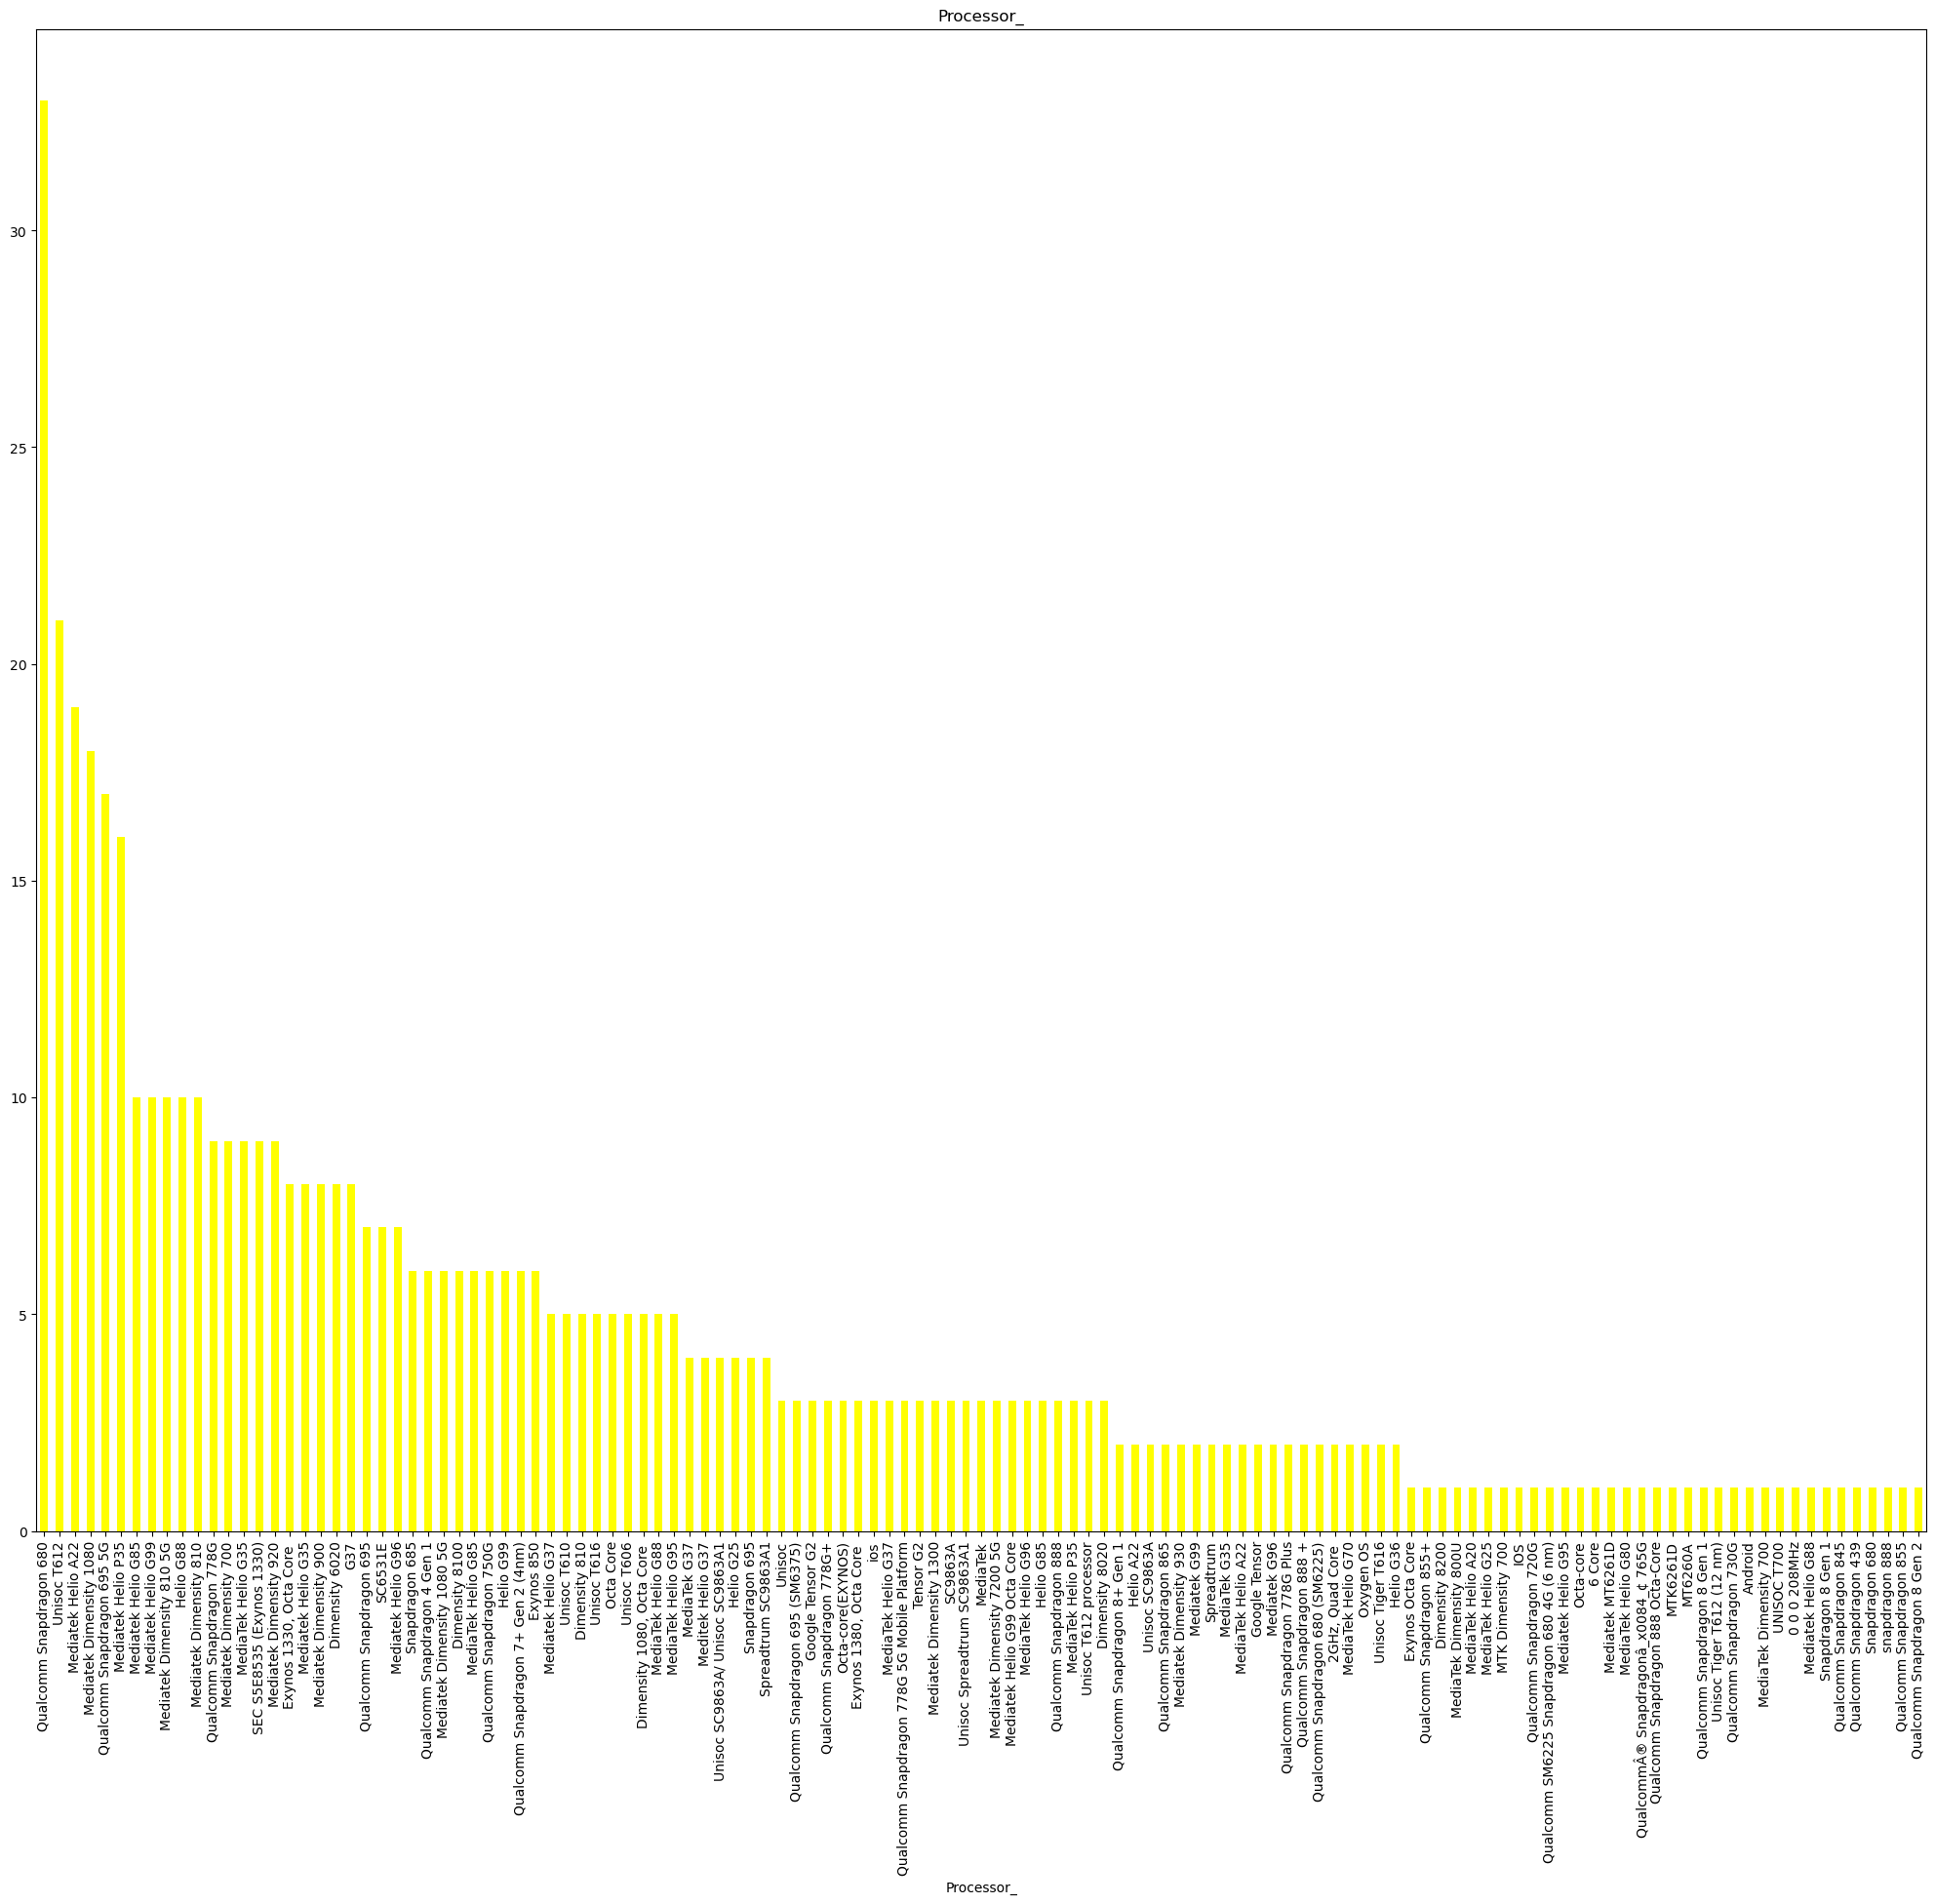

In [76]:
plt.figure(figsize = (25,20))
fd['Processor_'].value_counts().plot(kind = 'bar', color = 'yellow')
plt.title('Processor_')
plt.show()

output:
1) people are prefering processor_ like Qualcomm Snapdragon 680, Unisoc T606, Mediatek Helio A22, Mediatek Dimensity 1080 etc. 

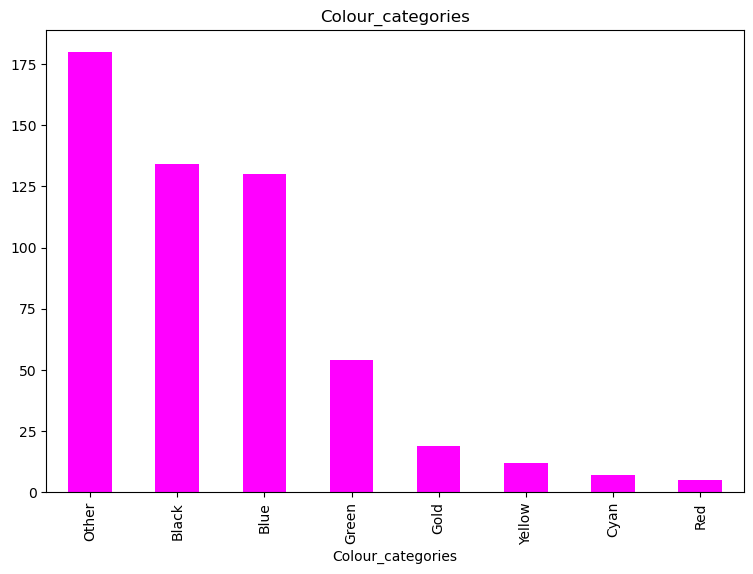

In [78]:
plt.figure(figsize = (9,6))
fd['Colour_categories'].value_counts().plot(kind = 'bar', color = 'magenta')
plt.title('Colour_categories')
plt.show()

output:
1) People are prefering highest number of black, blue and green colours mobile phone.
2) Here Some least prefered colours are grouped into other categories.

# Bivariant Analysis

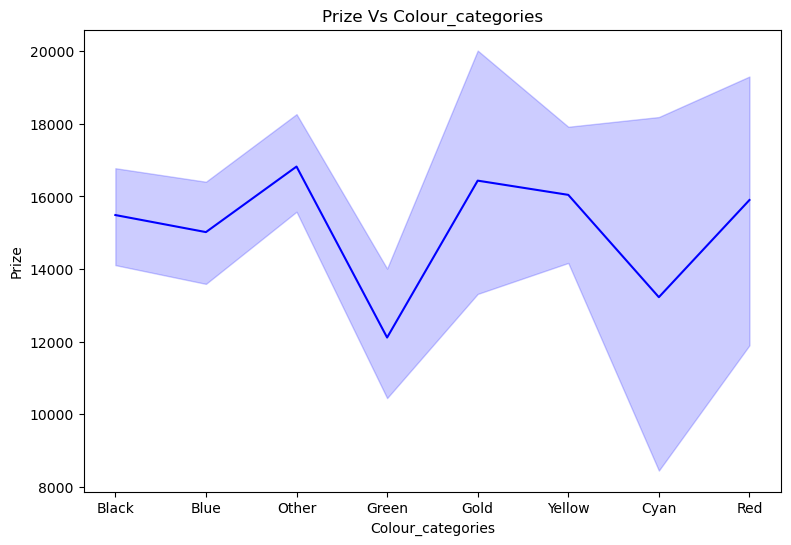

In [83]:
plt.figure(figsize = (9,6))
sns.lineplot(data = fd, x = 'Colour_categories', y = 'Prize',color='blue')
plt.title('Prize Vs Colour_categories')
plt.show()

Observation:
1) The Colours like black, blue, gold have tend to be a higher price.
2) The colours like green and cyan tend to be lower price as comapre to above.
3) The categories contain group of colours, so it also tend to be higher price.

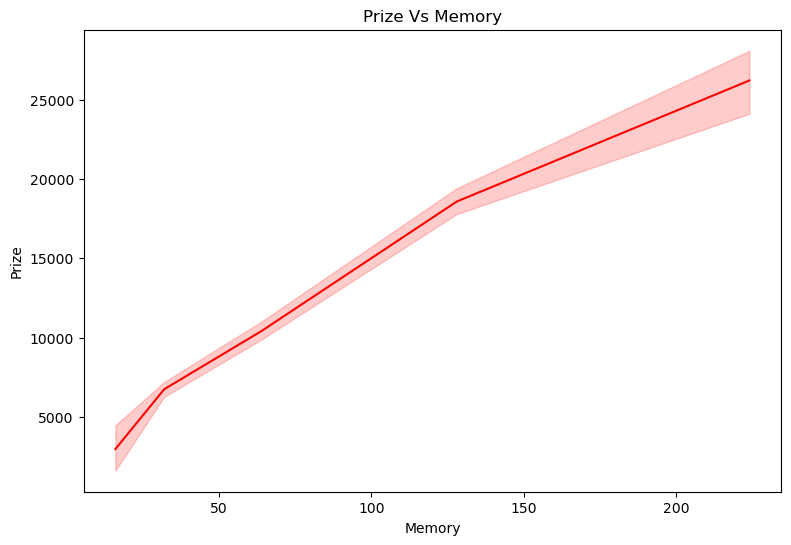

In [86]:
plt.figure(figsize = (9,6))
sns.lineplot(data = fd, x = 'Memory', y = 'Prize',color='red')
plt.title('Prize Vs Memory')
plt.show()

Observation:
1) The Memory and mobile prize has a direct positive relation.
2) by Increasing momory of mobile phone prize also increasing.
3) Devices with larger internal storage capacities tend to be more costly, reflecting consumer demand for higher storage in premium devices.

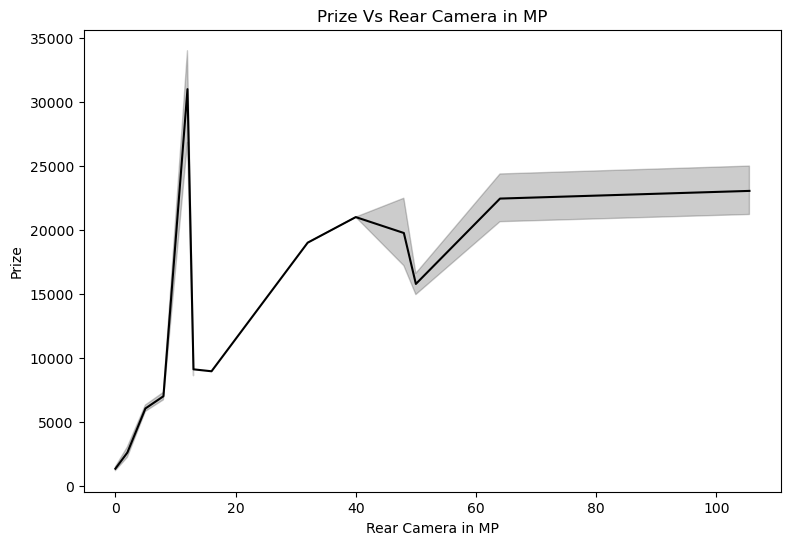

In [89]:
plt.figure(figsize = (9,6))
sns.lineplot(data = fd, x = 'Rear Camera in MP', y = 'Prize',color='black')
plt.title('Prize Vs Rear Camera in MP')
plt.show()

Observation:
1) This indicates that while higher rear camera resolutions generally contribute to increased pricing.
2) Rear camera quality is important but not the strongest determinant of price.

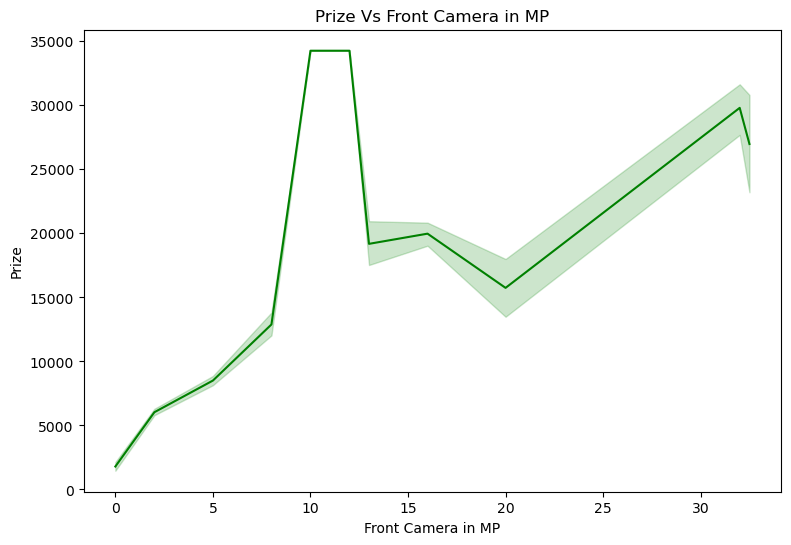

In [92]:
plt.figure(figsize = (9,6))
sns.lineplot(data = fd, x = 'Front Camera in MP', y = 'Prize',color='green')
plt.title('Prize Vs Front Camera in MP')
plt.show()

Observation:
1) This suggests that devices with higher front camera resolutions are often positioned as premium models.
2) The front camera plays a significant role in driving smartphone prices.

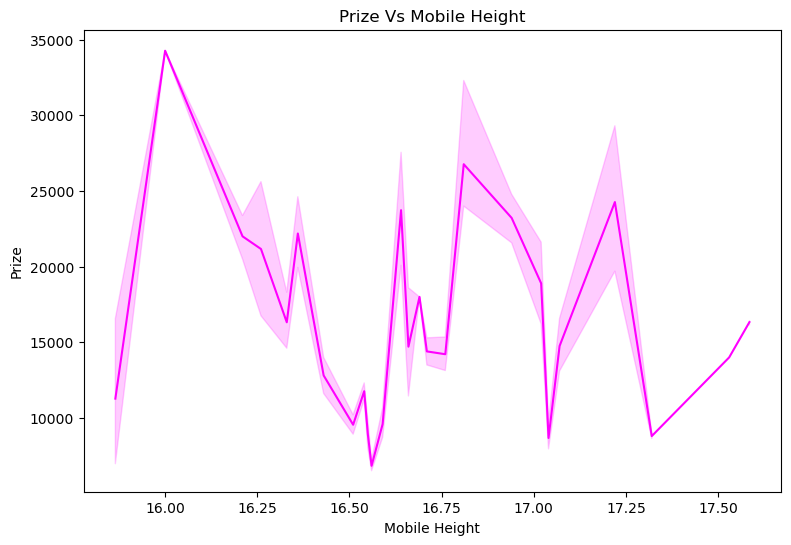

In [95]:
plt.figure(figsize = (9,6))
sns.lineplot(data = fd, x = 'Mobile Height', y = 'Prize',color='magenta')
plt.title('Prize Vs Mobile Height')
plt.show()

Observation:
1) Mobile height may also have impact on pricing.
2) 16.00 inches mobile phone tend to higher mobile prize as compared to others size.

# Multivariant Analysis

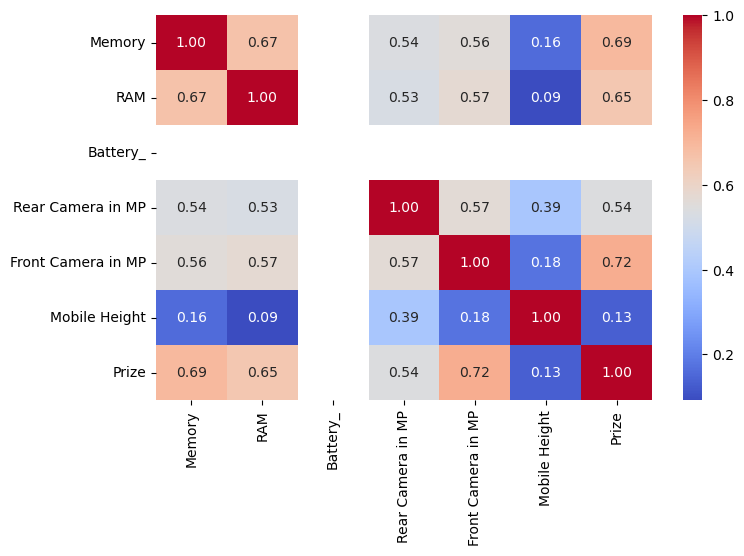

Prize                 1.000000
Front Camera in MP    0.723877
Memory                0.692721
RAM                   0.651490
Rear Camera in MP     0.541582
Mobile Height         0.132029
Battery_                   NaN
Name: Prize, dtype: float64


In [99]:
# Checking Correlation of numerical data with Prize 
correlation = fd[numerical_data].corr()
plt.figure(figsize=(8, 5))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
target_corr = correlation["Prize"].abs().sort_values(ascending=False)
print(target_corr)

Observation:
1) Front Camera in MP (0.72), Memory (0.69), and RAM (0.65) have a strong positive correlation with price, indicating that devices with better cameras,     higher storage, and more RAM tend to be more expensive.
2) Rear Camera in MP (0.54) shows a moderate correlation, suggesting that rear camera quality also impacts pricing but to a lesser extent.
3) Mobile Height (0.13) has a weak correlation, implying minimal impact on price.
4) Front camera quality, memory, and RAM are the most significant factors influencing smartphone prices.

# Split Data for Training & Testing and Normalisation of data

In [103]:
fd.head(5)

,Model,Memory,RAM,Battery_,Rear Camera in MP,Front Camera in MP,AI Lens,Mobile Height,Processor_,Prize,Colour_categories
0,Infinix SMART 7,64.0,4.0,5000.0,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Black
1,Infinix SMART 7,64.0,4.0,5000.0,13.0,5.0,1,16.76,Unisoc Spreadtrum SC9863A1,7299.0,Blue
2,MOTOROLA G32,128.0,8.0,5000.0,50.0,16.0,0,16.64,Qualcomm Snapdragon 680,11999.0,Other
3,POCO C50,32.0,2.0,5000.0,8.0,5.0,0,16.56,Mediatek Helio A22,5649.0,Blue
4,Infinix HOT 30i,128.0,8.0,5000.0,50.0,5.0,1,16.76,G37,8999.0,Other


In [105]:
# Feature data and target data seprate
X = fd.drop('Prize', axis = 1)
Y = fd['Prize']

In [107]:
# Split data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.20)

In [108]:
# Preprocessing of categorical_data and numerical_data by using OneHotEncoder + StandardScaler
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
categorical_data = ['Model', 'Processor_', 'Colour_categories']
numerical_data = ['Memory', 'RAM', 'Battery_', 'Rear Camera in MP', 'Front Camera in MP', 'Mobile Height']
preprocess = ColumnTransformer([
    ('categorical', OneHotEncoder(handle_unknown='ignore'), categorical_data),
    ('numerical', StandardScaler(), numerical_data)
], remainder='passthrough')

#  Transformed the data and convert into array then stored into new variable
X_train_transformed = preprocess.fit_transform(X_train).toarray()
X_test_transformed = preprocess.transform(X_test).toarray()
scaler = StandardScaler()
Y_train_scaled = scaler.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_scaled = scaler.transform(Y_test.values.reshape(-1, 1))


Output:
1)The Machine learning model only understands mumerical numbers, so categorical data are encoded into a numbers.
2) To give equal importance to all numerical dataset, the numerical data are scaled into a range 0-1. 
3) The splited dataset are ready to feed machine learning model.

# Import Algorithm

In [113]:
# Imported imporatnt Algorithm
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [115]:
# Create a model and fit training data in model
model_SVR = SVR().fit(X_train_transformed, Y_train_scaled)
model_KNN = KNeighborsRegressor().fit(X_train_transformed, Y_train_scaled)
model_DecisionTree = DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train_transformed, Y_train_scaled)
model_RandomForest = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train_transformed, Y_train_scaled)
model_GBR = GradientBoostingRegressor(n_estimators=200,learning_rate=0.05,max_depth=4,random_state=42).fit(X_train_transformed, Y_train_scaled)

In [116]:
# Predict the model by testing data
prediction_SVR = model_SVR.predict(X_test_transformed)
prediction_KNN = model_KNN.predict(X_test_transformed)
prediction_DecisionTree = model_DecisionTree.predict(X_test_transformed)
prediction_RandomForest = model_RandomForest.predict(X_test_transformed)
prediction_GBR = model_GBR.predict(X_test_transformed)

In [117]:
# Evaluate the result of model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test_scaled, prediction_SVR)

print('Support Vector Regression') 

print("MSE: ", mse)

rmse = np.sqrt(mse) 
print("RMSE: ",rmse)

r2 =  r2_score(Y_test_scaled, prediction_SVR)
print("R2 :",r2)

Support Vector Regression
MSE:  0.18470906541470736
RMSE:  0.4297779256950121
R2 : 0.8127914624647617


In [119]:
# Evaluate the result of model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test_scaled, prediction_KNN)
print('KNeighbors Regressor')

print("MSE: ", mse)

rmse = np.sqrt(mse) 
print("RMSE: ",rmse)

r2 =  r2_score(Y_test_scaled, prediction_KNN)
print("R2 :",r2)

KNeighbors Regressor
MSE:  0.1733229242364579
RMSE:  0.41632069878455225
R2 : 0.8243316802302733


In [123]:
# Evaluate the result of model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test_scaled, prediction_DecisionTree)
print('Decision Tree Regression')
print("MSE: ", mse)

rmse = np.sqrt(mse) 
print("RMSE: ",rmse)

r2 =  r2_score(Y_test_scaled, prediction_DecisionTree)
print("R2 :",r2)

Decision Tree Regression
MSE:  0.343827783543379
RMSE:  0.5863683002545235
R2 : 0.6515195592776075


In [125]:
# Evaluate the result of model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test_scaled, prediction_RandomForest)
print('Random Forest Regressor')

print("MSE: ", mse)

rmse = np.sqrt(mse) 
print("RMSE: ",rmse)

r2 =  r2_score(Y_test_scaled, prediction_RandomForest)
print("R2 :",r2)

Random Forest Regressor
MSE:  0.1418643880849637
RMSE:  0.3766488923187797
R2 : 0.8562159114275782


In [127]:
# Evaluate the result of model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test_scaled, prediction_GBR)
print('Gradient Boosting Regressor')
print("MSE: ", mse)

rmse = np.sqrt(mse) 
print("RMSE: ",rmse)

r2 =  r2_score(Y_test_scaled, prediction_GBR)
print("R2 :",r2)

Gradient Boosting Regressor
MSE:  0.1269011969483691
RMSE:  0.35623194262779007
R2 : 0.8713815835793635


# 

In [130]:
#Comparing the Model, which is giving the best result
model_result = {
    'Model': ["SVR", "KNN","Decision Tree", "Random Forest", "Gradient Boosting"],
    'MSE': [ 0.2488, 0.2331, 0.2567, 0.0959, 0.0749],
    'RMSE': [ 0.4988, 0.4828, 0.5067, 0.3098, 0.2737],
    'R² Score': [ 0.7617, 0.7767, 0.7541, 0.9081, 0.9282]}

# Creating DataFrame for model result
df = pd.DataFrame(model_result)

# Highlighting the best scores
model_Comparism = df.style.highlight_max(subset=['R² Score'], color='Lightblue')\
                .highlight_min(subset=['MSE', 'RMSE'], color='Lightblue')

model_Comparism

,Model,MSE,RMSE,R² Score
0,SVR,0.248800,0.498800,0.761700
1,KNN,0.233100,0.482800,0.776700
2,Decision Tree,0.256700,0.506700,0.754100
3,Random Forest,0.095900,0.309800,0.908100
4,Gradient Boosting,0.074900,0.273700,0.928200


Output:
1) Gradient Boosting Regressor is giving the highest score, indicating superior predictive accuracy and minimal error.
2) Random Forest Regressor is giving the second highest score, This model is a strong alternative.
3) Models like KNN and SVR may still be useful depending on the dataset’s complexity and specific requirements.
4) Decision Tree Regressor is giving the lowest score among five, so it is not recommended unless optimized with proper pruning and parameter tuning.

# Identifying which features are most to influences the mobile prize

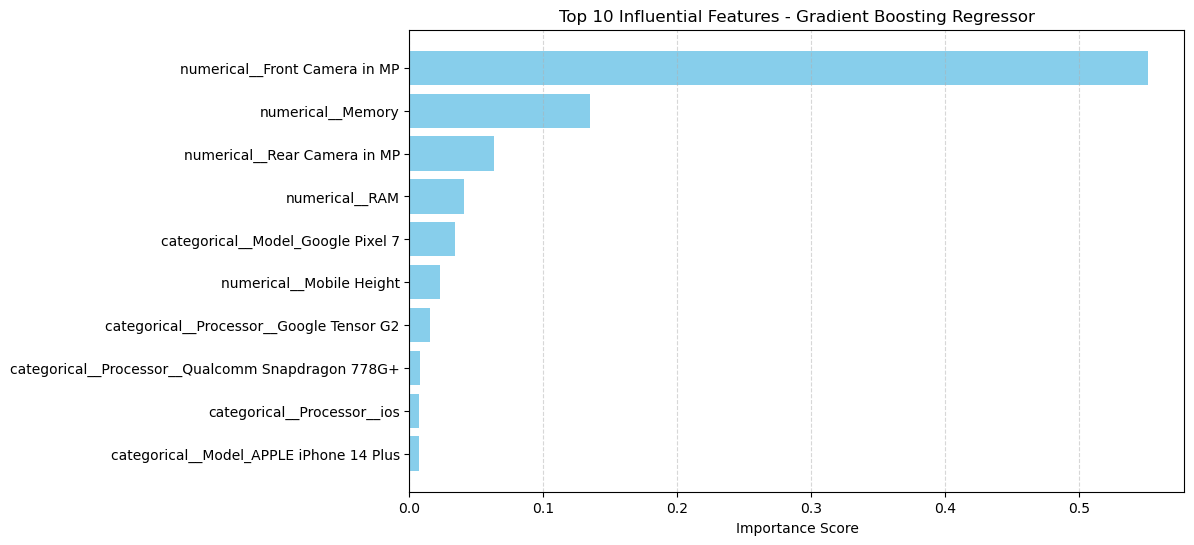

In [134]:
# Frature Importance Analysis
feature_names = preprocess.get_feature_names_out()

# Create DataFrame for Feature Importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': model_GBR.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display Top 10 Features Only
top_10_features = feature_importance_df.head(10)

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Influential Features - Gradient Boosting Regressor')
plt.gca().invert_yaxis()  # Invert for better readability
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

# Conclusion

1) The Front Camera in MP is the most significant factor influencing mobile prices, reflecting consumer demand for better selfies, video calls, and social media content. 
2) Memory ranks second, highlighting the preference for ample storage.
3) RAM also plays a key role, impacting performance and multitasking. 
4) Mobile Height and Rear Camera in MP have moderate influence.
5) while models like Google Pixel 7 and processors such as Google Tensor G2, Mediatek Dimensity 1080, and Snapdragon 778G+ further impact pricing, 
   indicating premium features and performance are valued.

# Recommendations for Mobile Company

1) Camera Enhancement Strategy: Invest in improving front camera features such as higher megapixels, advanced AI enhancements, and night mode.
   Emphasize camera capabilities in marketing campaigns to attract camera-conscious consumers.  
2) Memory and Storage Optimization: Offer multiple storage variants (e.g., 64GB, 128GB, 256GB) to cater to diverse customer needs.Highlight expandable 
   storage options to appeal to budget-conscious buyers.  
3) Performance Enhancement: Integrate higher RAM configurations in mid-range and premium models for better multitasking and gaming experiences. 
   Incorporate efficient processors like Qualcomm Snapdragon and Mediatek Dimensity to enhance performance.  
4) Design and Build Improvements: Focus on sleek, ergonomic designs with optimal screen sizes to improve consumer appeal.  
5) Brand and Processor Positioning: Market premium devices featuring powerful processors (e.g., Google Tensor G2, Snapdragon 778G+) for superior 
   performance and gaming potential. Collaborate with renowned chipset brands to strengthen product positioning.  
6) Targeted Marketing: Focus campaigns on showcasing improved front camera features and memory enhancements as key price determinants.Highlight 
   model-specific strengths (e.g., Google Pixel's camera technology or Infinix Zero’s unique selling points) to attract distinct customer segments.